# 不動産取引価格情報APIからデータを取得

In [3]:
!pip install requests
!pip3 install matplotlib

In [8]:
import json
import csv
import requests
import pandas as pd
 
#url = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20151&to=20202&city=13102"
url = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20192&to=20202&area=13"

response = requests.get(url)
jsonData = response.json()
 
#Get keys
keys=[]
data_num = len(jsonData["data"])
 
for i in range(data_num):
    keys.extend(list(jsonData["data"][i].keys()))
keys = set(keys)
 
#Get data
output=[keys]
for i in range(data_num):
    temp=[]
    for key in keys:
        try:
            temp.append(jsonData["data"][i][key])
        except:
            temp.append("NaN")
    output.append(temp)

In [9]:
#Export CSV file
with open("output1.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(output)

# データを見やすいように整形

In [78]:
import os
import pandas as pd
import csv

df = pd.read_csv("output1.csv")
df = pd.DataFrame(df)
df

df1 = df.dropna(subset=["FloorPlan"])
df1 = df1.loc[:, ["Municipality",'TradePrice','FloorPlan','Period',]]
df2 = df1[(df1['Municipality'] == "千代田区")]

df2['Period'] = df2['Period'].str.replace('四半期', '')
df2["Period"] = df2["Period"].str.replace('年第', '')
df2["Period"] = df2["Period"].str.replace('１', '1').str.replace('２', '2').str.replace('３', '3').str.replace('４', '4')
df2

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Municipality,TradePrice,FloorPlan,Period
2,千代田区,65000000,３ＬＤＫ,20201
3,千代田区,40000000,１ＬＤＫ,20193
4,千代田区,130000000,３ＬＤＫ,20193
5,千代田区,36000000,１ＬＤＫ,20193
8,千代田区,100000000,２ＬＤＫ,20192
...,...,...,...,...
388,千代田区,100000000,２ＬＤＫ,20201
389,千代田区,190000000,３ＬＤＫ,20194
390,千代田区,95000000,１ＤＫ,20202
392,千代田区,85000000,１ＬＤＫ,20194


# 「FloorPlan」と「TradePrice」の情報を散布図としてグラフ化

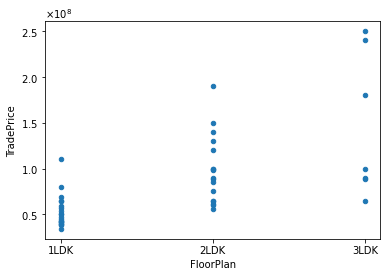

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
plt.rcParams["font.family"] = "MS Gothic"

period = (df2.Period == "20202") | (df2.Period == "20201")
df3 = df2.loc[period]

df3 = df3.sort_values('FloorPlan')

df3['FloorPlan'] = df3['FloorPlan'].str.replace('１ＬＤＫ', '1LDK').str.replace('２ＬＤＫ', '2LDK').str.replace('３ＬＤＫ', '3LDK')#全角のままだとグラフが文字化けする

floorplan = (df3.FloorPlan == "1LDK") | (df3.FloorPlan == "2LDK") | (df3.FloorPlan == "3LDK")
df3 = df3.loc[floorplan]


ax =df3.plot.scatter(x='FloorPlan', y='TradePrice')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# LIFULL HOMESからスクレイピングで情報を取得

In [ ]:
!pip3 install beautifulsoup4

In [138]:
from bs4 import BeautifulSoup
import requests

url = 'https://toushi.homes.co.jp/bukkensearch/tbg[]=2/'

res = requests.get(url)
res.text

<div class="prBknList" id="prBknList0">
<div class="prBox">PR</div>
<div class="bknListDetail">
<div class="listDetailTitleArea">
<p class="listDetailTitle">
<span class="u-icon-propertyType_mansion">一棟マンション</span>
<a href="/bukkendetail/index/300720004935/?detailFrom=bmb">新高円寺マンション　　担当／石坂</a>
<input id="hid_pr_detail_url0" type="hidden" value="/bukkendetail/index/300720004935/?detailFrom=bmb"/>
</p>
<p class="shopName">協栄建設株式会社</p>
</div><!-- /listDetailTitleArea -->
<div class="bknStatusWrapper">
<div class="bknImageArea">
<a href="/bukkendetail/index/300720004935/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fftec2rgvvcly75p.jpg&amp;width=123&amp;height=80"/></a> <a href="/bukkendetail/index/300720004935/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fftec2rgvvcly75p.jpg&amp;width=123&amp;height=80"/></a> </div>
<table>
<tr>
<th class="price">価格</th>
<

In [140]:
soup = BeautifulSoup(res.text, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="ja" xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="noarchive" name="robots"/>
<title>【ホームズ】一棟マンションを購入する - 収益物件を利回りや価格等で絞り込み ｜ 不動産投資物件[一棟売りマンション・中古一棟マンション]で資産運用</title>
<meta content="一棟売りマンション一覧 - 収益物件検索｜不動産投資の専門サイト【LIFULL HOME‘S 不動産投資】マンション投資に最適な一棟売りマンションを検索して、価格や想定利回りで比較。資産運用をマンション投資でサポート" name="description"/>
<script language="javascript" src="/js/library/jquery/jquery-1.8.3.min.js" type="text/javascript"></script>
<script language="javascript" src="/js/library/jquery/jquery.cookie.js" type="text/javascript"></script>
<script language="javascript" src="/js/library/jquery/jquery.slides.min.js" type="text/javascript"></script>
<script language

In [142]:
item_list = soup.find('div', {'class': 'prArea'})
item_list

<div class="prArea">
<div class="prBknList" id="prBknList0">
<div class="prBox">PR</div>
<div class="bknListDetail">
<div class="listDetailTitleArea">
<p class="listDetailTitle">
<span class="u-icon-propertyType_mansion">一棟マンション</span>
<a href="/bukkendetail/index/300720004935/?detailFrom=bmb">新高円寺マンション　　担当／石坂</a>
<input id="hid_pr_detail_url0" type="hidden" value="/bukkendetail/index/300720004935/?detailFrom=bmb"/>
</p>
<p class="shopName">協栄建設株式会社</p>
</div><!-- /listDetailTitleArea -->
<div class="bknStatusWrapper">
<div class="bknImageArea">
<a href="/bukkendetail/index/300720004935/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fftec2rgvvcly75p.jpg&amp;width=123&amp;height=80"/></a> <a href="/bukkendetail/index/300720004935/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fftec2rgvvcly75p.jpg&amp;width=123&amp;height=80"/></a> </div>
<table>
<tr>
<th cl

In [143]:
items = item_list.find_all('div', class_='prBknList')
item = items[0]
item

<div class="prBknList" id="prBknList0">
<div class="prBox">PR</div>
<div class="bknListDetail">
<div class="listDetailTitleArea">
<p class="listDetailTitle">
<span class="u-icon-propertyType_mansion">一棟マンション</span>
<a href="/bukkendetail/index/300720004935/?detailFrom=bmb">新高円寺マンション　　担当／石坂</a>
<input id="hid_pr_detail_url0" type="hidden" value="/bukkendetail/index/300720004935/?detailFrom=bmb"/>
</p>
<p class="shopName">協栄建設株式会社</p>
</div><!-- /listDetailTitleArea -->
<div class="bknStatusWrapper">
<div class="bknImageArea">
<a href="/bukkendetail/index/300720004935/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fftec2rgvvcly75p.jpg&amp;width=123&amp;height=80"/></a> <a href="/bukkendetail/index/300720004935/?detailFrom=bmb"><img alt="外観" src="https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fftec2rgvvcly75p.jpg&amp;width=123&amp;height=80"/></a> </div>
<table>
<tr>
<th class="price">価格</th>
<

In [145]:
rimawari = item.find('span', {'class': 'perNum'}).text
rimawari

'5.30％'

In [146]:
#len(item_list.find_all('span', class_='address'))

price = item.find('span', {'class': 'valueNum'}).text
price

'1億9,900万円'

In [148]:
address = item.find('span', {'class': 'address'}).text
address

'東京都杉並区松ノ木2丁目'

In [150]:
walk = item.find('span', {'class': 'walk'}).text
walk

'東京メトロ丸ノ内線 新高円寺駅 徒歩10分'

In [155]:
#gaikan = item.find({'img': 'src'})
#gaikan
gaikan = item.find('img')['src']
gaikan

'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fftec2rgvvcly75p.jpg&width=123&height=80'

In [156]:
walk = item.find('span', {'class': 'walk'}).text
walk

'東京メトロ丸ノ内線 新高円寺駅 徒歩10分'

# 上で確認した機能を関数化して一括で処理
取得した情報をリスト型で記録

In [157]:
url = 'https://toushi.homes.co.jp/bukkensearch/tbg[]=2/'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
item_list = soup.find('div', {'class': 'prArea'})
items = item_list.find_all('div', class_='prBknList')

bukken_data = []
for item in items:
    data_list = {}
    data_list['address'] = item.find('span', {'class': 'address'}).text
    data_list['walk'] = item.find('span', {'class': 'walk'}).text
    data_list['gaikan'] = item.find('img')['src']
    data_list['price'] = item.find('span', {'class': 'valueNum'}).text
    data_list['rimawari'] = item.find('span', {'class': 'perNum'}).text
    
    bukken_data.append(data_list)

In [158]:
bukken_data

[{'address': '東京都中野区上高田2丁目',
  'walk': '西武新宿線 新井薬師前駅 徒歩9分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2F75n82rgvvclyf9d.jpg&width=123&height=80',
  'price': '1億6,500万円',
  'rimawari': '4.50％'},
 {'address': '福島県南相馬市原町区錦町1丁目19',
  'walk': 'JR常磐線 原ノ町駅 徒歩3分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fehs12rhlwikf2od.jpeg&width=123&height=80',
  'price': '8,421万円',
  'rimawari': '13.23％'},
 {'address': '和歌山県和歌山市吉田',
  'walk': 'JR和歌山線 和歌山駅 徒歩10分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fx2362rr48o0eeix.jpg&width=123&height=80',
  'price': '4,000万円',
  'rimawari': '12.00％'},
 {'address': '東京都荒川区町屋3丁目',
  'walk': '東京メトロ千代田線 町屋駅 徒歩6分',
  'gaikan': 'https://image.homes.co.jp/smallimg/image.php?file=http%3A%2F%2Fimg.homes.jp%2Fhz9b2rr2ez1stwu.jpg&width=123&height=80',
  'price': '1億800万円',
  'rimawari': '7.12％'}]

In [161]:
#リストをで
df_bukken = pd.DataFrame(bukken_data)
df_bukken

,address,walk,gaikan,price,rimawari
0,東京都中野区上高田2丁目,西武新宿線 新井薬師前駅 徒歩9分,https://image.homes.co.jp/smallimg/image.php?f...,"1億6,500万円",4.50％
1,福島県南相馬市原町区錦町1丁目19,JR常磐線 原ノ町駅 徒歩3分,https://image.homes.co.jp/smallimg/image.php?f...,"8,421万円",13.23％
2,和歌山県和歌山市吉田,JR和歌山線 和歌山駅 徒歩10分,https://image.homes.co.jp/smallimg/image.php?f...,"4,000万円",12.00％
3,東京都荒川区町屋3丁目,東京メトロ千代田線 町屋駅 徒歩6分,https://image.homes.co.jp/smallimg/image.php?f...,1億800万円,7.12％


In [170]:
df_bukken.to_csv('bukken_data.csv')

In [171]:
df = pd.read_csv('bukken_data.csv', index_col=0)
df

,address,walk,gaikan,price,rimawari
0,東京都中野区上高田2丁目,西武新宿線 新井薬師前駅 徒歩9分,https://image.homes.co.jp/smallimg/image.php?f...,"1億6,500万円",4.50％
1,福島県南相馬市原町区錦町1丁目19,JR常磐線 原ノ町駅 徒歩3分,https://image.homes.co.jp/smallimg/image.php?f...,"8,421万円",13.23％
2,和歌山県和歌山市吉田,JR和歌山線 和歌山駅 徒歩10分,https://image.homes.co.jp/smallimg/image.php?f...,"4,000万円",12.00％
3,東京都荒川区町屋3丁目,東京メトロ千代田線 町屋駅 徒歩6分,https://image.homes.co.jp/smallimg/image.php?f...,1億800万円,7.12％
